# Step 1: Import Required Libraries


In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Step 2: Upload and Load the Dataset


In [2]:
uploaded = files.upload()
import os
os.listdir()

df = pd.read_csv("cleaned_titanic_data.csv")
df.head()

Saving cleaned_titanic_data.csv to cleaned_titanic_data.csv


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Step 3: Data Preprocessing


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [4]:
# Separate features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [5]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train/Validation/Test Split


In [6]:
# Split into train (60%) and temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)

In [7]:
# Split temp into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [8]:
print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))

Train size: 534
Validation size: 178
Test size: 179


# Step 5: Try Different K values


K = 1 -> Validation Accuracy: 0.7753
K = 2 -> Validation Accuracy: 0.7584
K = 3 -> Validation Accuracy: 0.8146
K = 4 -> Validation Accuracy: 0.8090
K = 5 -> Validation Accuracy: 0.8034
K = 6 -> Validation Accuracy: 0.8034
K = 7 -> Validation Accuracy: 0.8146
K = 8 -> Validation Accuracy: 0.8202
K = 9 -> Validation Accuracy: 0.8034
K = 10 -> Validation Accuracy: 0.8146
K = 11 -> Validation Accuracy: 0.8315
K = 12 -> Validation Accuracy: 0.8315
K = 13 -> Validation Accuracy: 0.8427
K = 14 -> Validation Accuracy: 0.8258
K = 15 -> Validation Accuracy: 0.8315
K = 16 -> Validation Accuracy: 0.8202
K = 17 -> Validation Accuracy: 0.8315
K = 18 -> Validation Accuracy: 0.8258
K = 19 -> Validation Accuracy: 0.8146
K = 20 -> Validation Accuracy: 0.8202


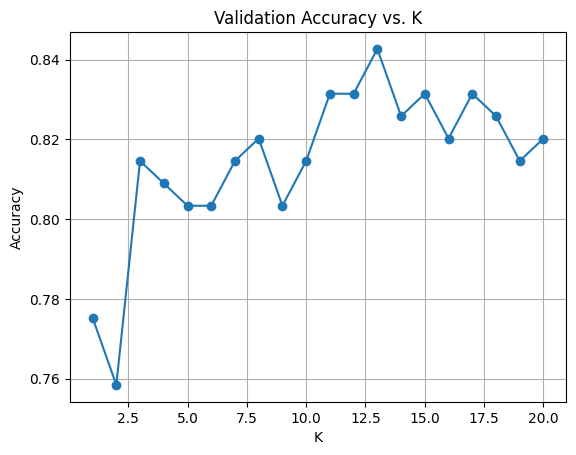

Best K value based on validation set: 13


In [22]:
val_accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_val, y_val)
    val_accuracies.append(acc)
    print(f"K = {k} -> Validation Accuracy: {acc:.4f}")

# Plot accuracy vs. K
plt.plot(range(1, 21), val_accuracies, marker='o')
plt.title("Validation Accuracy vs. K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

best_k = np.argmax(val_accuracies) + 1
print("Best K value based on validation set:", best_k)


# Step 6: Evaluate Final Model on Test Set

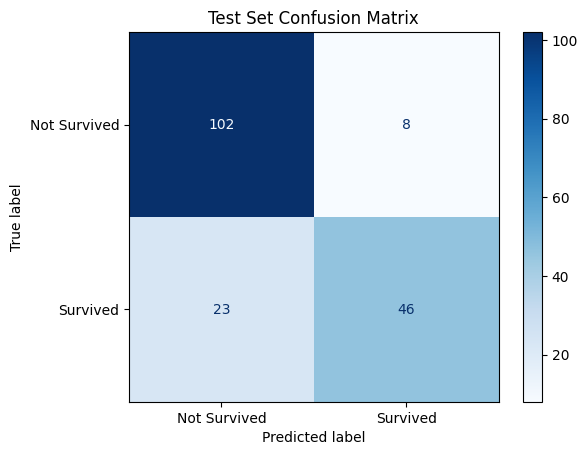

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.85      0.67      0.75        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



In [18]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)

y_pred_test = final_knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Survived", "Survived"])
disp.plot(cmap="Blues")
plt.title("Test Set Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_test))


# Step 7: k-Fold Cross-Validation


In [19]:
knn_cv = KNeighborsClassifier(n_neighbors=best_k)
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5, scoring='accuracy')

print("5-Fold Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


5-Fold Cross-Validation Scores: [0.73831776 0.80373832 0.79439252 0.81308411 0.80188679]
Average CV Accuracy: 0.7902839005466407


# Step 8: Overfitting Discussion


In [21]:
train_acc = final_knn.score(X_train, y_train)
val_acc = final_knn.score(X_val, y_val)
test_acc = final_knn.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)

# Overfitting analysis
if train_acc - test_acc > 0.1:
    print("Potential overfitting detected (train much higher than test).")
else:
    print("Model generalizes well (no major overfitting).")


Train Accuracy: 0.8202247191011236
Validation Accuracy: 0.8426966292134831
Test Accuracy: 0.8268156424581006
Model generalizes well (no major overfitting).


I used the Titanic dataset from Assignment 1. The main goal was to predict whether a passenger (`Survived`: 0 = No, 1 = Yes) using the KNN algorithm


### Preprocessing
I used the cleaned version of the Titanic dataset i cleaned and scaled its features using `StandardScaler` before to make sure that there is no biasness in distance calculations for KNN

Then i splitted the data into:
- 60% for training
- 20% for validation
- 20% for testing

------------------------

### KNN Model
To find the best value for K, I tried all values from 1 to 20 and evaluated them on the validation set. The best performance came from:
- K = 13
- Validation Accuracy: 84.27%

This value of K was then used to train the final model.

---------------

### Final Model Evaluation on Test Set that was 20%
Using K = 13, the model achieved the following:

- Test Accuracy: 82.68%
- Precision & Recall Not Survived:
  - Precision: 0.82
  - Recall: 0.93
  - F1-score: 0.87
- Precision & Recall Survived:
  - Precision: 0.85
  - Recall: 0.67
  - F1-score: 0.75

The model predicted non-survivors was more than survivors

-----------------------------

### Cross-Validation Results
To ensure model was working good always not only on one split, I ran 5-fold cross-validation on the training set:

- Fold Accuracies:  
  73.8%, 80.4%, 79.4%, 81.3%, 80.2%
- Average CV Accuracy: 79.03%

The model is not overfitting to any subset of the data.

-------------------------------------------------

### Performance Comparison

| Dataset         | Accuracy |
|-----------------|----------|
| Training Set    | 82.02%   |
| Validation Set  | 84.27%   |
| Test Set        | 82.68%   |
| Cross-Validation| 79.03%   |

The model showed stable performance across all sets, with no

---

###  Insights and Observations
- The confusion matrix showed strong performance on non-survivors and slightly weaker recall for survivors
- Visualization of accuracy vs K helped pick the optimal K = 13

---

### Conclusion
The KNN model with K = 13 delivered solid and balanced results. It generalizes well, with consistent performance across training, validation, test, and cross-validation.
---